In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
import numpy as np
%matplotlib inline

In [2]:
import re

In [3]:
pip install gensim

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
sentences = """Over the course of my career, I have had the opportunity to immerse myself in the dynamic and ever-evolving field of mobile application development. I have been fortunate enough to work on a diverse array of projects, each with its own unique set of challenges and requirements, which has allowed me to grow and expand my skill set significantly.

A major aspect of my professional journey has been my proficiency in both Flutter and Android development. This dual expertise has enabled me to create applications that not only perform efficiently across platforms but also provide a cohesive and consistent user experience. I have developed an in-depth understanding of these frameworks, allowing me to utilize their full potential in developing cross-platform applications that maintain high performance and adaptability.

I believe that mobile app development is not just about writing code but about crafting an experience that resonates with users. As such, I approach every project with a user-first mindset, ensuring that the applications I create are not only functional but also intuitive and user-friendly. By focusing on usability and responsiveness, I strive to make sure that each app I develop engages users and provides a seamless interaction, which is crucial for retaining their interest and trust.

In my experience, I have worked on a wide range of mobile applications, from simple, minimalist utility apps to complex, feature-rich platforms that integrate advanced functionalities. This diversity has taught me the importance of flexibility and adaptability. Whether it's integrating API services, managing state, optimizing for performance, or implementing cutting-edge UI/UX designs, I am committed to using the best practices and most efficient tools available to achieve the desired outcome.

My projects have often required a blend of creativity and technical expertise. I pride myself on my ability to transform creative concepts and visions into tangible, functional applications. This process requires careful planning, precise execution, and a willingness to iterate based on feedback. I work closely with clients, designers, and other developers to ensure that the end product aligns with the initial vision and meets the project’s goals. I value collaboration as a means to achieve the best possible results.

Quality and performance are at the forefront of my development philosophy. I pay close attention to every detail, from the initial wireframing stages to the final deployment, ensuring that the application not only meets functional requirements but also performs seamlessly across various devices and platforms. I implement efficient coding practices, utilize the best libraries and tools available, and consistently test and refine my applications to ensure they are optimized for both speed and reliability.

In addition, I am passionate about staying updated with the latest technological trends in the mobile development sphere. I actively seek out new learning opportunities, whether through online courses, community forums, or collaborative projects, to keep my skills sharp and my knowledge current. This dedication to continuous learning allows me to incorporate modern features and technologies into my apps, providing a cutting-edge experience for users.

When it comes to building applications, I also pay special attention to scalability and maintainability. I design my apps with future growth in mind, structuring the codebase in a modular and reusable way so that updates and new features can be integrated with minimal disruption. This not only benefits the immediate project but also ensures the long-term success and sustainability of the application.

Ultimately, my goal is to deliver mobile applications that exceed user expectations. I am committed to creating solutions that are not only technically robust but also aesthetically appealing. By blending my technical skills with a focus on delivering polished and engaging user experiences, I aim to make a meaningful impact through my work.

In summary, my career in mobile app development has been shaped by a continuous pursuit of excellence, creativity, and innovation. Leveraging my skills in Flutter and Android, I am dedicated to building high-quality, user-centric applications that stand out in today’s competitive market."""

Clean Data

In [5]:
# remove special characters
sentences = re.sub('[^A-Za-z0-9]+', ' ', sentences)

# remove 1 letter words
sentences = re.sub(r'(?:^| )\w(?:$| )', ' ', sentences).strip()

# lower all characters
sentences = sentences.lower()

In [6]:
sentences

'over the course of my career have had the opportunity to immerse myself in the dynamic and ever evolving field of mobile application development have been fortunate enough to work on diverse array of projects each with its own unique set of challenges and requirements which has allowed me to grow and expand my skill set significantly major aspect of my professional journey has been my proficiency in both flutter and android development this dual expertise has enabled me to create applications that not only perform efficiently across platforms but also provide cohesive and consistent user experience have developed an in depth understanding of these frameworks allowing me to utilize their full potential in developing cross platform applications that maintain high performance and adaptability believe that mobile app development is not just about writing code but about crafting an experience that resonates with users as such approach every project with user first mindset ensuring that the

Vocabulary

In [30]:
words = sentences.split()
vocab = set(words)

In [31]:
vocab

{'ability',
 'about',
 'achieve',
 'across',
 'actively',
 'adaptability',
 'addition',
 'advanced',
 'aesthetically',
 'aim',
 'aligns',
 'allowed',
 'allowing',
 'allows',
 'also',
 'am',
 'an',
 'and',
 'android',
 'api',
 'app',
 'appealing',
 'application',
 'applications',
 'approach',
 'apps',
 'are',
 'array',
 'as',
 'aspect',
 'at',
 'attention',
 'available',
 'based',
 'be',
 'been',
 'believe',
 'benefits',
 'best',
 'blend',
 'blending',
 'both',
 'building',
 'but',
 'by',
 'can',
 'career',
 'careful',
 'centric',
 'challenges',
 'clients',
 'close',
 'closely',
 'code',
 'codebase',
 'coding',
 'cohesive',
 'collaboration',
 'collaborative',
 'comes',
 'committed',
 'community',
 'competitive',
 'complex',
 'concepts',
 'consistent',
 'consistently',
 'continuous',
 'course',
 'courses',
 'crafting',
 'create',
 'creating',
 'creative',
 'creativity',
 'cross',
 'crucial',
 'current',
 'cutting',
 'dedicated',
 'dedication',
 'deliver',
 'delivering',
 'deployment',
 '

In [29]:
from gensim.models import Word2Vec
# Build vocabulary from tokenized sentences
model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=1, workers=4)
vocab = model.wv.index_to_key  # Vocabulary

# Get total number of words and sentences
total_words = len(vocab)
total_sentences = len(sentences)

print(f"Total Words: {total_words}")
print(f"Total Sentences: {total_sentences}")

Total Words: 27
Total Sentences: 4186


In [9]:
vocab_size = len(vocab)
embed_dim = 10
context_size = 2

Implementation

In [10]:
word_to_ix = {word: i for i, word in enumerate(vocab)}
ix_to_word = {i: word for i, word in enumerate(vocab)}

Data bags

In [32]:
# data - [(context), target]

data = []
for i in range(2, len(words) - 2):
    context = [words[i - 2], words[i - 1], words[i + 1], words[i + 2]]
    target = words[i]
    data.append((context, target))
print(data[:50])

[(['over', 'the', 'of', 'my'], 'course'), (['the', 'course', 'my', 'career'], 'of'), (['course', 'of', 'career', 'have'], 'my'), (['of', 'my', 'have', 'had'], 'career'), (['my', 'career', 'had', 'the'], 'have'), (['career', 'have', 'the', 'opportunity'], 'had'), (['have', 'had', 'opportunity', 'to'], 'the'), (['had', 'the', 'to', 'immerse'], 'opportunity'), (['the', 'opportunity', 'immerse', 'myself'], 'to'), (['opportunity', 'to', 'myself', 'in'], 'immerse'), (['to', 'immerse', 'in', 'the'], 'myself'), (['immerse', 'myself', 'the', 'dynamic'], 'in'), (['myself', 'in', 'dynamic', 'and'], 'the'), (['in', 'the', 'and', 'ever'], 'dynamic'), (['the', 'dynamic', 'ever', 'evolving'], 'and'), (['dynamic', 'and', 'evolving', 'field'], 'ever'), (['and', 'ever', 'field', 'of'], 'evolving'), (['ever', 'evolving', 'of', 'mobile'], 'field'), (['evolving', 'field', 'mobile', 'application'], 'of'), (['field', 'of', 'application', 'development'], 'mobile'), (['of', 'mobile', 'development', 'have'], 'a

Embeddings

In [12]:
embeddings =  np.random.random_sample((vocab_size, embed_dim))

Linear Model

In [13]:
def linear(m, theta):
    w = theta
    return m.dot(w)

Log softmax + NLLloss = Cross Entropy

In [14]:
def log_softmax(x):
    e_x = np.exp(x - np.max(x))
    return np.log(e_x / e_x.sum())

In [15]:
def NLLLoss(logs, targets):
    out = logs[range(len(targets)), targets]
    return -out.sum()/len(out)

In [16]:
def log_softmax_crossentropy_with_logits(logits,target):

    out = np.zeros_like(logits)
    out[np.arange(len(logits)),target] = 1

    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)

    return (- out + softmax) / logits.shape[0]

Forward function

In [17]:
def forward(context_idxs, theta):
    m = embeddings[context_idxs].reshape(1, -1)
    n = linear(m, theta)
    o = log_softmax(n)

    return m, n, o

Backward function

In [18]:
def backward(preds, theta, target_idxs):
    m, n, o = preds

    dlog = log_softmax_crossentropy_with_logits(n, target_idxs)
    dw = m.T.dot(dlog)

    return dw

Optimize function

In [19]:
def optimize(theta, grad, lr=0.03):
    theta -= grad * lr
    return theta

Training

In [20]:
theta = np.random.uniform(-1, 1, (2 * context_size * embed_dim, vocab_size))

In [21]:
epoch_losses = {}

for epoch in range(80):

    losses =  []

    for context, target in data:
        context_idxs = np.array([word_to_ix[w] for w in context])
        preds = forward(context_idxs, theta)

        target_idxs = np.array([word_to_ix[target]])
        loss = NLLLoss(preds[-1], target_idxs)

        losses.append(loss)

        grad = backward(preds, theta, target_idxs)
        theta = optimize(theta, grad, lr=0.03)


    epoch_losses[epoch] = losses

Analyze

Plot loss/epoch

Text(0, 0.5, 'Losses')

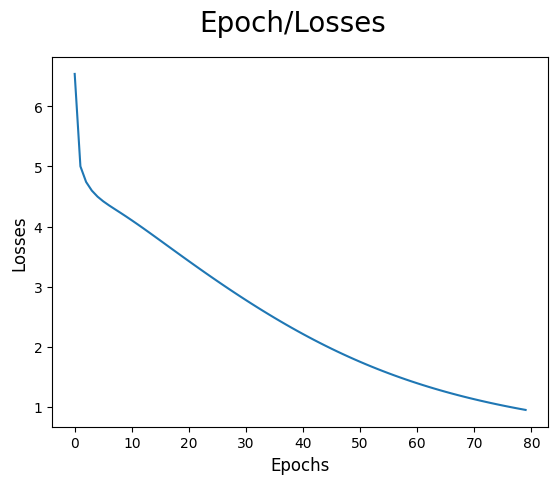

In [22]:
ix = np.arange(0,80)

fig = plt.figure()
fig.suptitle('Epoch/Losses', fontsize=20)
plt.plot(ix,[epoch_losses[i][0] for i in ix])
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Losses', fontsize=12)

Predict function

In [23]:
def predict(words):
    context_idxs = np.array([word_to_ix[w] for w in words])
    preds = forward(context_idxs, theta)
    word = ix_to_word[np.argmax(preds[-1])]

    return word

In [24]:

predict(['over', 'the', 'of', 'my' ])

'course'

Accuracy

In [25]:
def accuracy():
    wrong = 0

    for context, target in data:
        if(predict(context) != target):
            wrong += 1

    return (1 - (wrong / len(data)))

In [26]:
accuracy()

0.8125